In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Path: greenary.ipynb

In [2]:
# read csv file
greenary_raw = pd.read_csv('./녹지현황_20230530183942.csv', index_col=[0,1], header=1)
# drop first row
greenary_raw = greenary_raw.drop(greenary_raw.index[0])
# drop index with [소계, 중부공원녹지사업소, 안전총괄실]
greenary_raw = greenary_raw.drop(['소계', '중부공원녹지사업소', '안전총괄실'], level=1)
# change index name
greenary_raw.index.names = ['시', '구']

greenary_raw.replace('-', 0, inplace=True)

# get odd columns for area
greenary_area = greenary_raw.iloc[:, 1::2]
greenary_area.columns = greenary_area.columns.str.split('.').str[0]
greenary_area = greenary_area.astype('float64')
# get even columns for count
greenary_count = greenary_raw.iloc[:, ::2]
greenary_count =  greenary_count.astype('float64')

# df for area/count ratio
greenary_ratio = greenary_area / greenary_count
greenary_ratio = greenary_ratio.fillna(0)
greenary_ratio = greenary_ratio.astype('float64')
greenary_ratio.head()

합계         시설녹지         일반녹지         분리대           수벽  \
시   구                                                                     
서울시 종로구   398.583630  2448.045455   280.642298  936.666667   881.285714   
    중구    553.972500  1216.384615   339.902985  996.625000    74.000000   
    용산구  1027.985632  2511.166667  1016.051948  452.777778  1212.833333   
    성동구   750.790640  2409.066667   368.068702  316.666667   356.125000   
    광진구  1144.569721  2970.857143  1872.014925    0.000000   343.833333   

              수림대    하천변조경       간이휴게소    지하철환기구주변        건물주변     아파트 및 학교  \
시   구                                                                         
서울시 종로구      0.00      0.0  276.250000  422.000000  474.571429   698.760000   
    중구       0.00      0.0  237.906250  113.200000  819.484211   975.343750   
    용산구  11383.00  17200.0  535.558824   37.333333  724.500000  1486.419355   
    성동구  16753.75   6781.0  807.833333  700.000000  363.060606  1018.390244   
    광진구   5440.00   2760.0  469.382979   91.250000  209.125000  1079.795455   

              침수공간조성          기타  
시   구                             
서울시 종로구   907.000000   97.461538  
    중구   3000.000000  451.000000  
    용산구   120.666667   84.055556  
    성동구   344.800000    0.000000  
    광진구  1397.153846  884.166667

In [3]:
satisfy_raw = pd.read_csv('./지역+녹지+만족도_20230530183658.csv', index_col=[0,1], header=1)
# drop index ['성별', '연령별', '학력별', '소득별', '혼인상태별', '지역대분류']
satisfy_raw = satisfy_raw.drop(satisfy_raw.index[0:26])
satisfy_raw.index.names = ['시', '구']
satisfy_raw.head()

매우 불만족 (점)  약간 불만족 (점)  보통 (점)  약간 만족 (점)  매우 만족 (점)  10점 평균 (%)
시     구                                                                    
지역소분류 종로구         2.9        10.1    44.8       33.1        9.2        5.89
      중구          1.0         8.6    44.3       37.9        8.1        6.09
      용산구         2.0        14.1    40.5       30.0       13.5        5.97
      성동구         3.9        11.3    35.1       34.8       14.9        6.14
      광진구         1.4        12.6    40.0       33.0       13.0        6.09

In [4]:
gu_greenary_area = greenary_area.groupby('구').sum()
print(gu_greenary_area.head())
print(gu_greenary_area.shape)

gu_greenary_count = greenary_count.groupby('구').sum()
print(gu_greenary_count.head())
print(gu_greenary_count.shape)

gu_greenary_ratio = greenary_ratio.groupby('구').mean()
print(gu_greenary_ratio.head())
print(gu_greenary_ratio.shape)

gu_satisfy = satisfy_raw.groupby('구').mean()
print(gu_satisfy.head())
print(gu_satisfy.shape)

            합계      시설녹지      일반녹지      분리대      수벽      수림대      하천변조경  \
구                                                                         
강남구  2007604.0  415713.0  179994.0  32058.0  6255.0  61400.0  1158477.0   
강동구   605754.0  129054.0  139847.0  24280.0  6080.0  64660.0    75215.0   
강북구   138655.0   21317.0   24387.0      0.0  2110.0      0.0     5630.0   
강서구  1152736.0  326773.0  690090.0  16493.0  4454.0   9940.0        0.0   
관악구   252556.0    7316.0   47192.0  33418.0   300.0   8230.0    27225.0   

       간이휴게소  지하철환기구주변     건물주변  아파트 및 학교  침수공간조성       기타  
구                                                           
강남구  13876.0     437.0  18999.0  116770.0  1975.0   1650.0  
강동구  27444.0     100.0  42886.0   85590.0  4882.0   5716.0  
강북구  13574.0      50.0  33249.0   37933.0   100.0    305.0  
강서구    462.0    1350.0  11367.0   72622.0     0.0  19185.0  
관악구  60635.0       0.0   9515.0   56957.0   954.0    814.0  
(25, 13)
        합계   시설녹지   일반녹지  분리대   수벽  수림

In [23]:
gu_greenary_area.sort_values(by='합계', ascending=False)

,합계,시설녹지,일반녹지,분리대,수벽,수림대,하천변조경,간이휴게소,지하철환기구주변,건물주변,아파트 및 학교,침수공간조성,기타
구,,,,,,,,,,,,,
강남구,2007604.0,415713.0,179994.0,32058.0,6255.0,61400.0,1158477.0,13876.0,437.0,18999.0,116770.0,1975.0,1650.0
서초구,1449157.0,868591.0,215625.0,16184.0,9624.0,59910.0,188340.0,17956.0,3827.0,11071.0,52109.0,1103.0,4817.0
강서구,1152736.0,326773.0,690090.0,16493.0,4454.0,9940.0,0.0,462.0,1350.0,11367.0,72622.0,0.0,19185.0
송파구,1001474.0,284171.0,250516.0,65523.0,11440.0,174315.0,69365.0,35196.0,1497.0,28026.0,76596.0,4378.0,450.0
마포구,886405.0,158543.0,374898.0,3590.0,3172.0,134037.0,22482.0,34455.0,1127.0,21885.0,50289.0,1700.0,80227.0
영등포구,798772.0,41529.0,426541.0,21202.0,4658.0,30174.0,65765.0,27288.0,1500.0,11833.0,88878.0,5464.0,73940.0
노원구,660058.0,197553.0,67272.0,800.0,12000.0,114213.0,76658.0,10328.0,379.0,27345.0,146060.0,7350.0,100.0
구로구,628110.0,84808.0,185013.0,28872.0,3563.0,12019.0,153198.0,22208.0,0.0,13495.0,81398.0,15498.0,28038.0
강동구,605754.0,129054.0,139847.0,24280.0,6080.0,64660.0,75215.0,27444.0,100.0,42886.0,85590.0,4882.0,5716.0


# 녹지 면적에 따른 만족도

In [5]:
# get correlation between greenary count and satisfy
for col in gu_greenary_area.columns:
    x = gu_greenary_area[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    print(col, round(corr[0,1], 4))

합계 0.2433
시설녹지 0.2999
일반녹지 -0.162
분리대 0.0352
수벽 0.1517
수림대 0.3285
하천변조경 0.2528
간이휴게소 -0.0719
지하철환기구주변 0.2266
건물주변 0.1937
아파트 및 학교 0.078
침수공간조성 -0.0232
기타 -0.0692


Text(0, 0.5, '만족도')

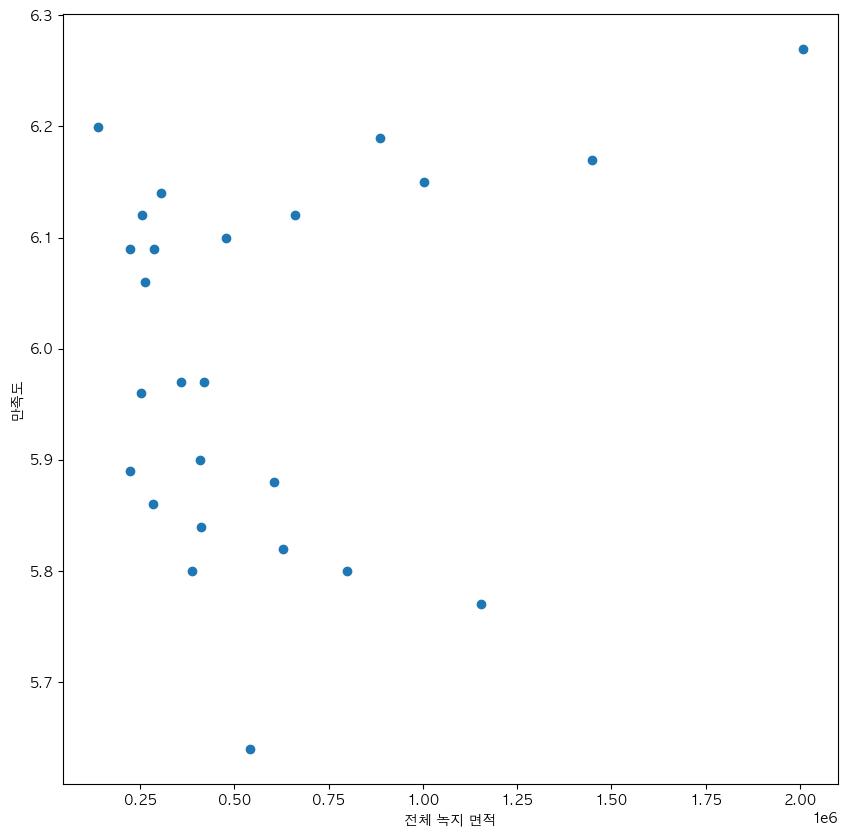

In [24]:
# draw graph for each gu

# Path: greenary.ipynb
# draw graph for each gu
# plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 10))
plt.scatter(gu_greenary_area['합계'], gu_satisfy['10점 평균 (%)'])
plt.xlabel('전체 녹지 면적')
plt.ylabel('만족도')

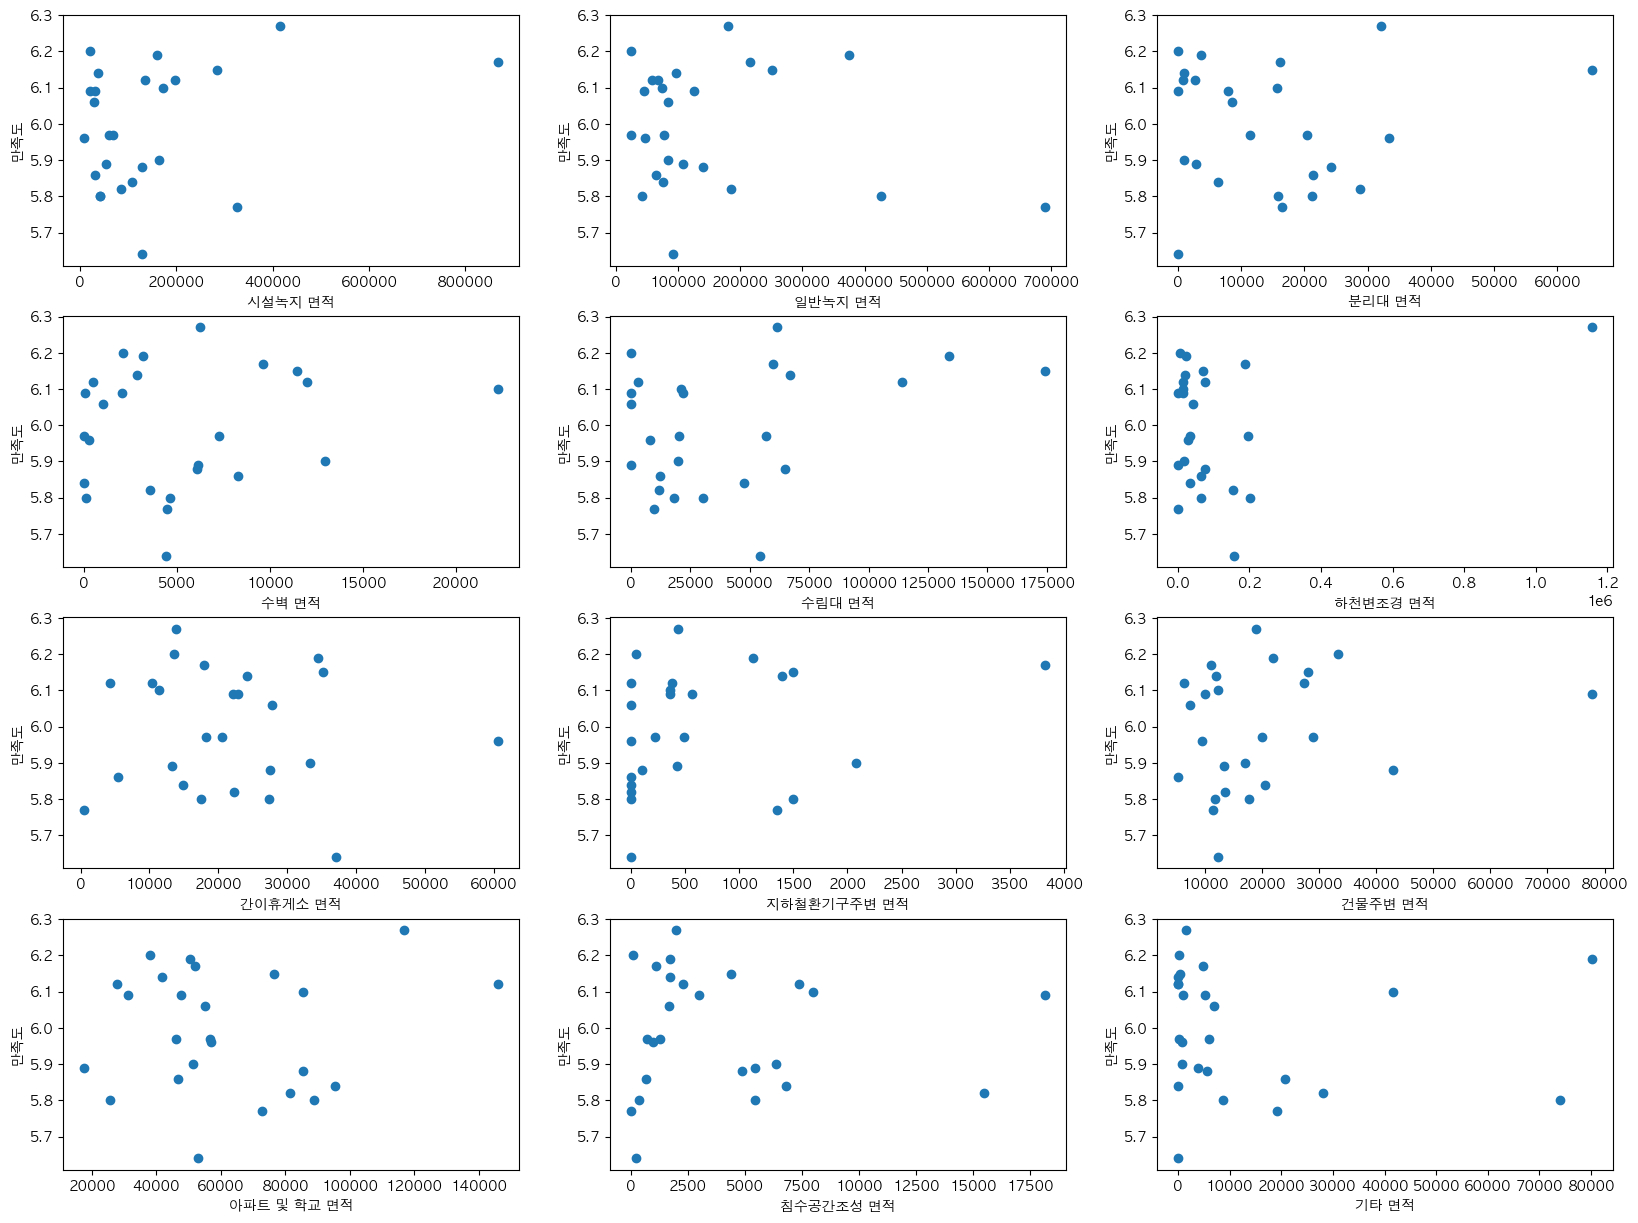

In [7]:
# draw for each col in gu_greenary_area
plt.figure(figsize=(20, 15))
for i, col in enumerate(gu_greenary_area.columns[1:]):
    plt.subplot(4, 3, i+1)
    plt.scatter(gu_greenary_area[col], gu_satisfy['10점 평균 (%)'])
    plt.xlabel(f'{col} 면적')
    plt.ylabel('만족도')

Text(0, 0.5, '만족도')

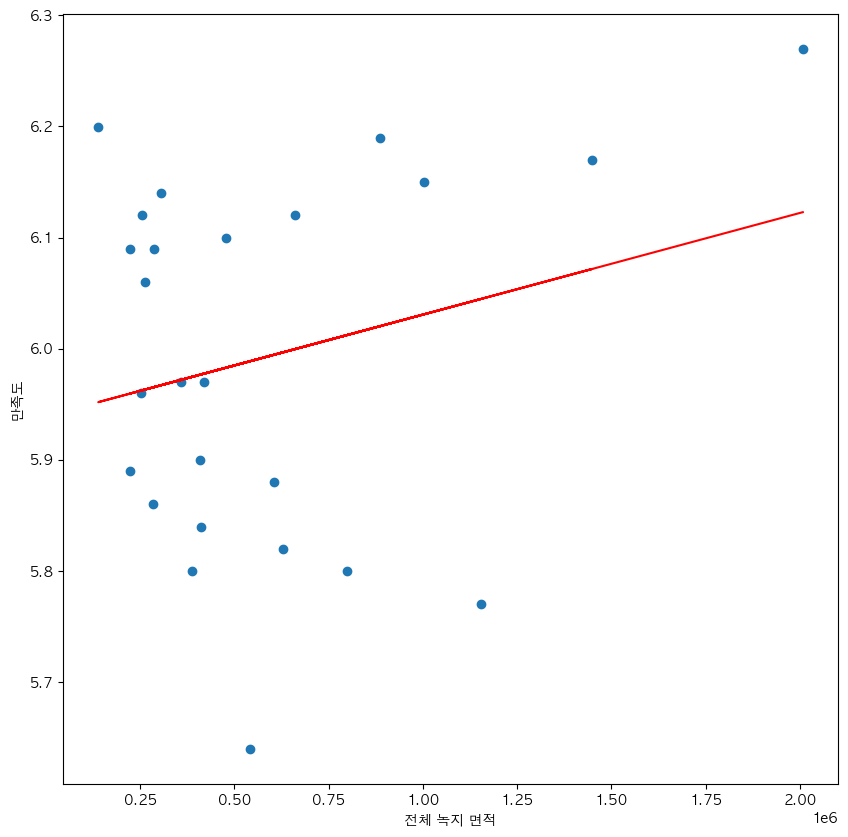

In [8]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gu_greenary_area['합계'].values.reshape(-1, 1)
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('전체 녹지 면적')
plt.ylabel('만족도')

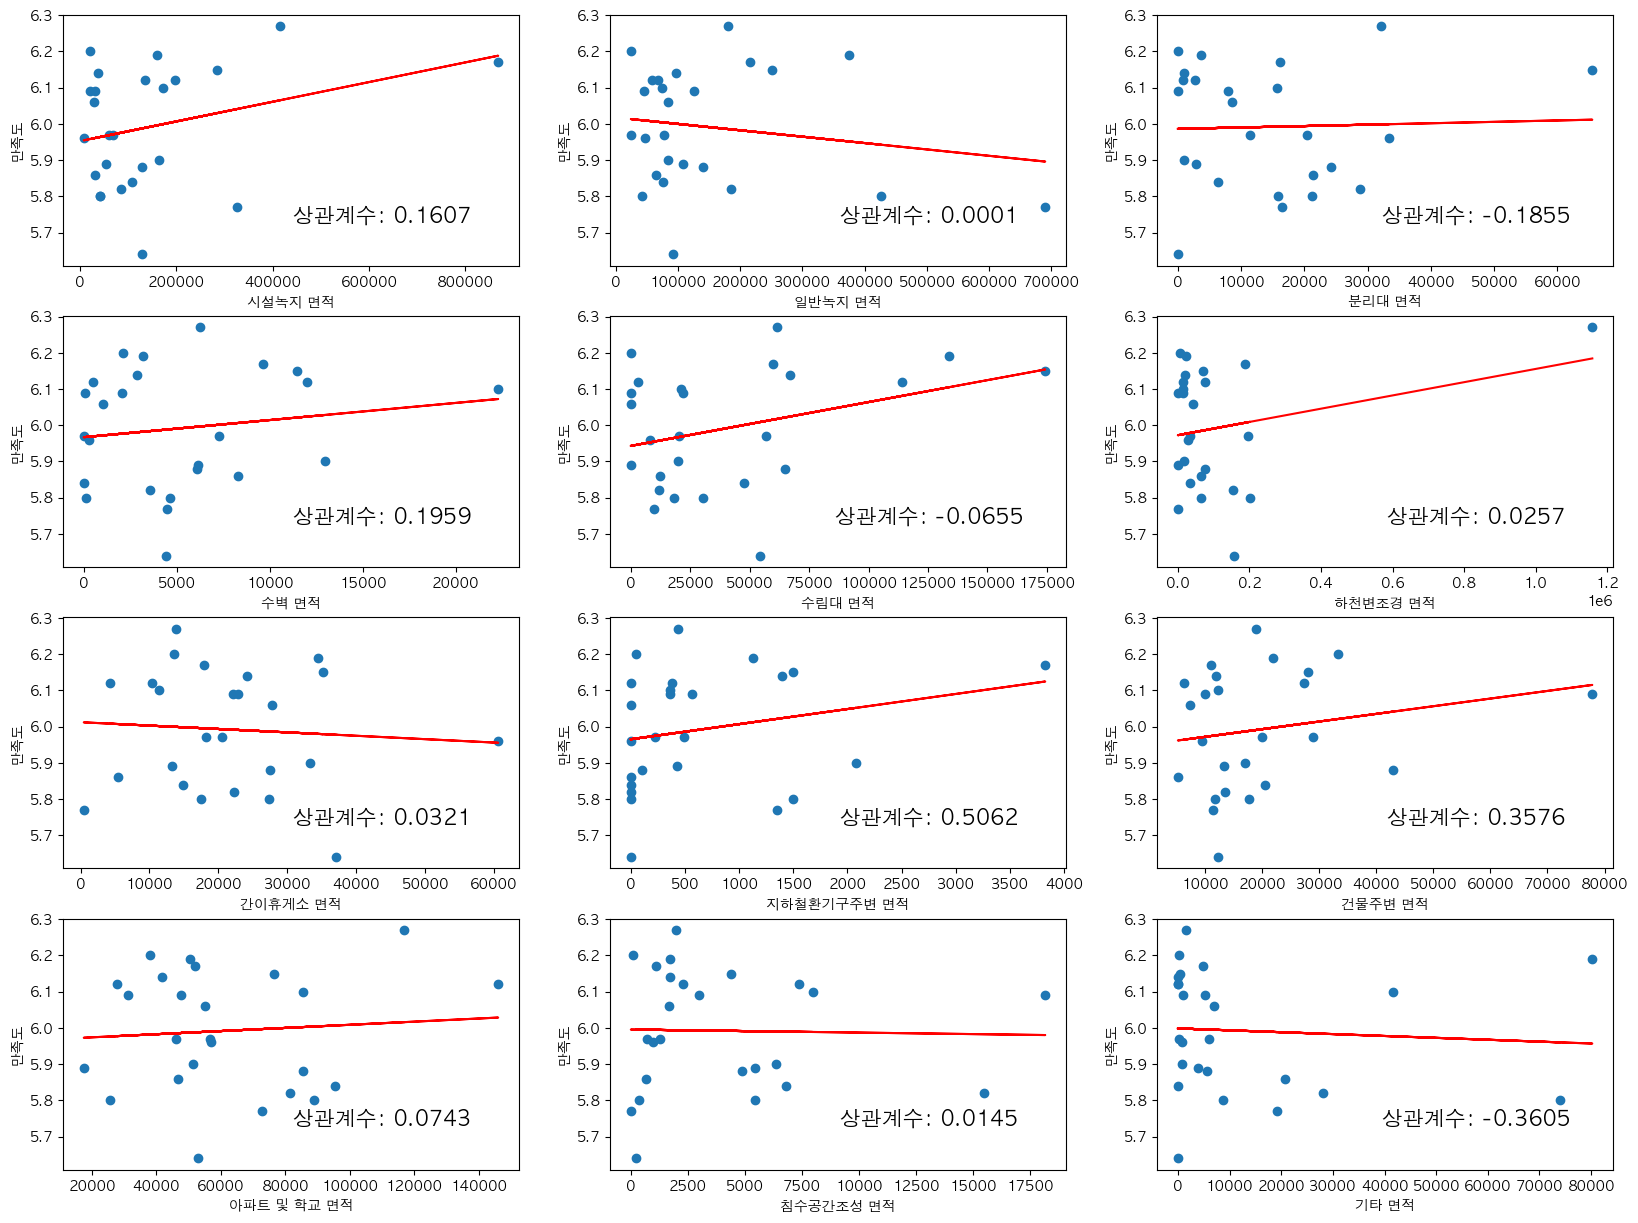

In [9]:
# linear regression for each col
plt.figure(figsize=(20, 15))

for i, col in enumerate(gu_greenary_area.columns[1:]):
    X = gu_greenary_area[col].values.reshape(-1, 1)
    y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

    # train model
    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_pred = model.predict(X)

    # draw graph
    plt.subplot(4, 3, i+1)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(f'{col} 면적')
    plt.ylabel('만족도')

    # plt.text(0.7, 0.3, f"Score: {round(model.score(X, y), 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    x = gu_greenary_count[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    plt.text(0.7, 0.2, f"상관계수: {round(corr[0,1], 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

Text(0, 0.5, '예측값')

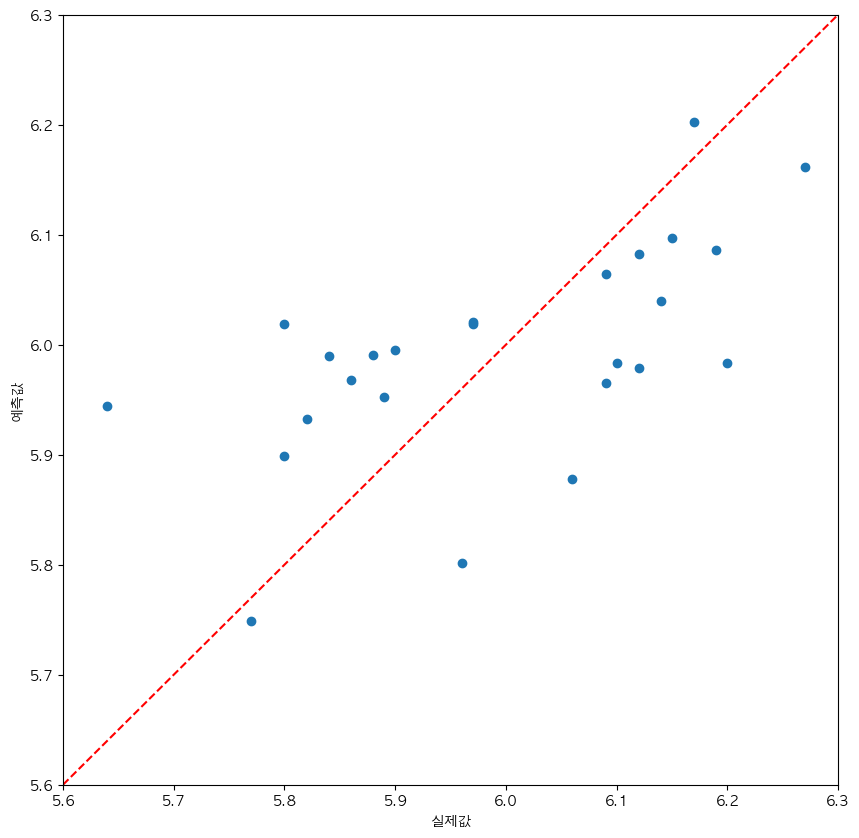

In [10]:
# multiple linear regression

X = gu_greenary_area.iloc[:, 1:]
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred)
plt.plot([5.6, 6.3], [5.6, 6.3], color='red', linestyle='--')
plt.xlim(5.6, 6.3)
plt.ylim(5.6, 6.3)
plt.xlabel('실제값')
plt.ylabel('예측값')


# 녹지 개수에 따른 만족도

In [11]:
# get correlation between greenary count and satisfy
for col in gu_greenary_count.columns:
    x = gu_greenary_count[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    print(col, round(corr[0,1], 4))

합계 0.0718
시설녹지 0.1607
일반녹지 0.0001
분리대 -0.1855
수벽 0.1959
수림대 -0.0655
하천변조경 0.0257
간이휴게소 0.0321
지하철환기구주변 0.5062
건물주변 0.3576
아파트 및 학교 0.0743
침수공간조성 0.0145
기타 -0.3605


Text(0, 0.5, '만족도')

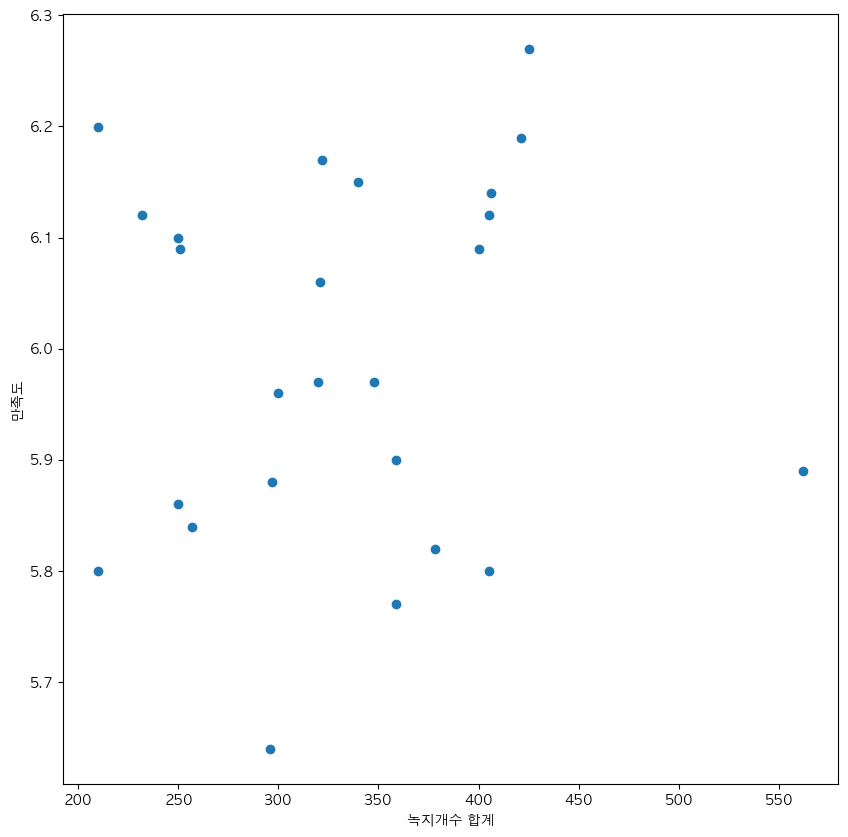

In [12]:
# draw graph for each gu

# Path: greenary.ipynb
# draw graph for each gu
# plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 10))
plt.scatter(gu_greenary_count['합계'], gu_satisfy['10점 평균 (%)'])
plt.xlabel('녹지개수 합계')
plt.ylabel('만족도')

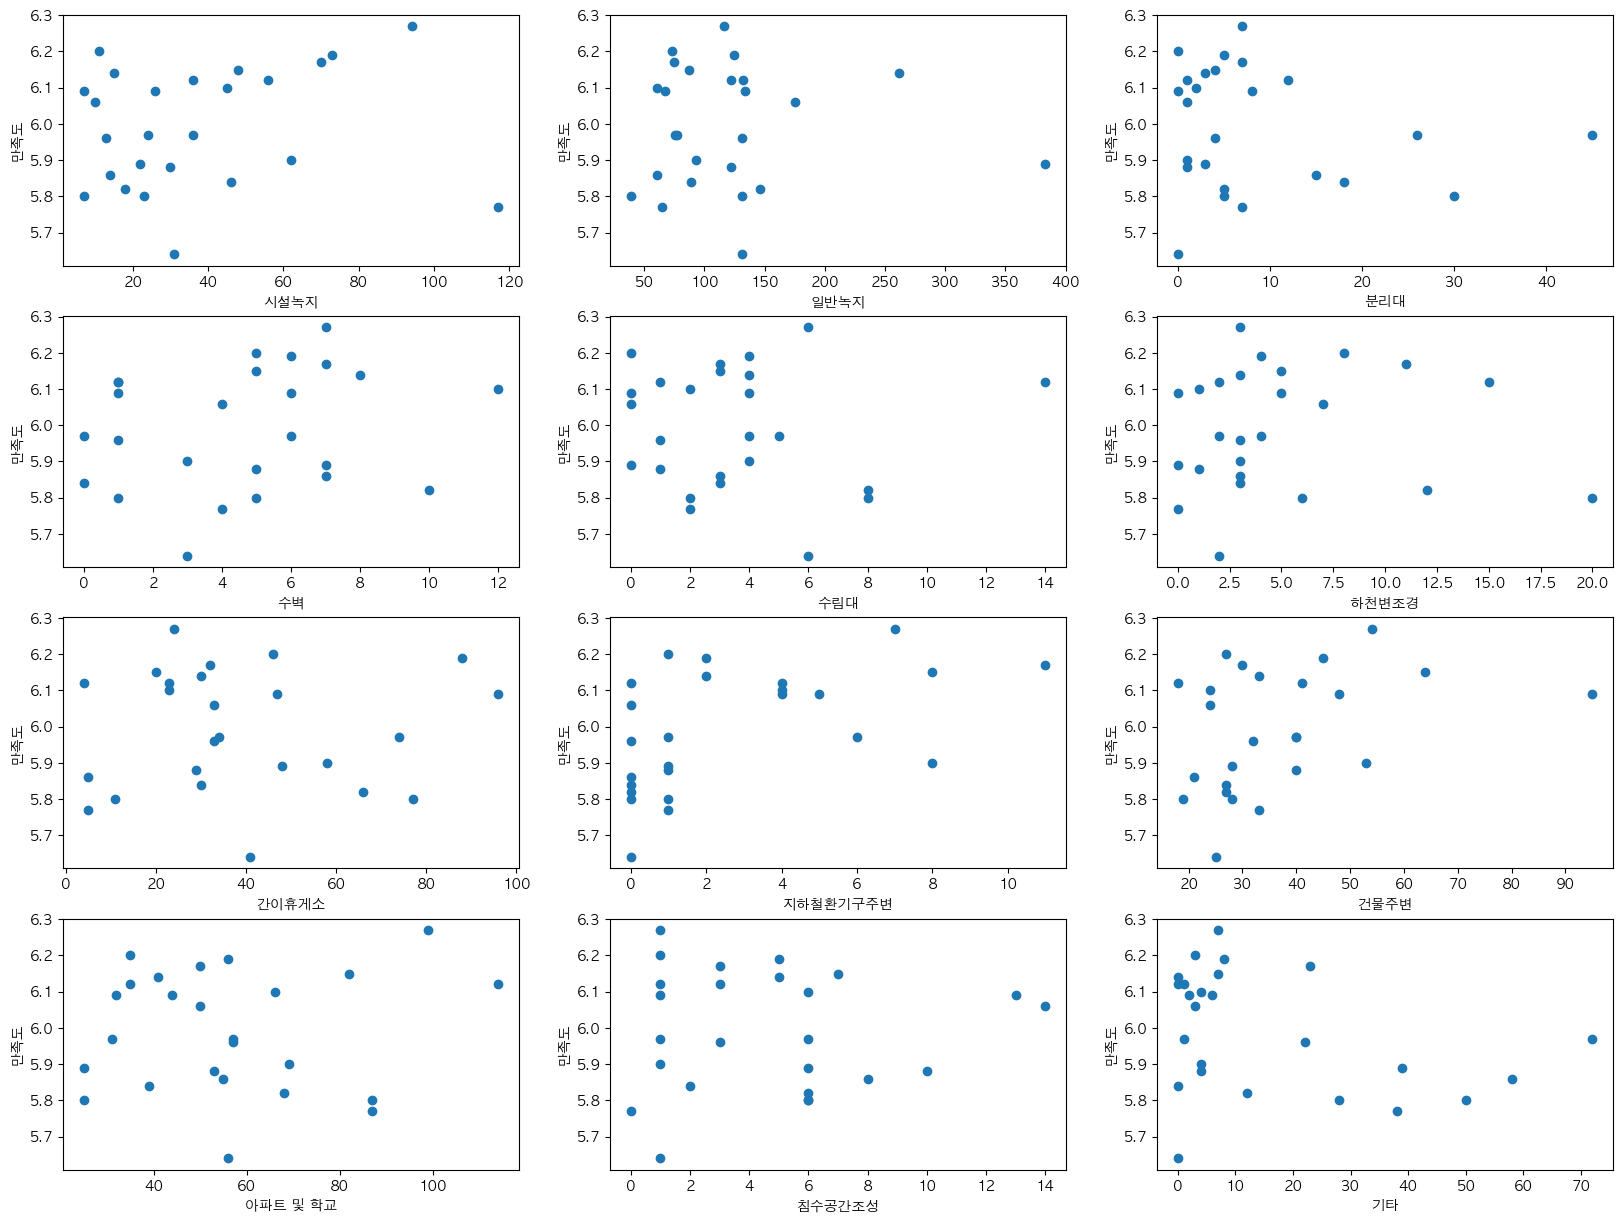

In [13]:
# draw for each col in gu_greenary_area
plt.figure(figsize=(20, 15))
for i, col in enumerate(gu_greenary_count.columns[1:]):
    plt.subplot(4, 3, i+1)
    plt.scatter(gu_greenary_count[col], gu_satisfy['10점 평균 (%)'])
    plt.xlabel(col)
    plt.ylabel('만족도')

Text(0, 0.5, '만족도')

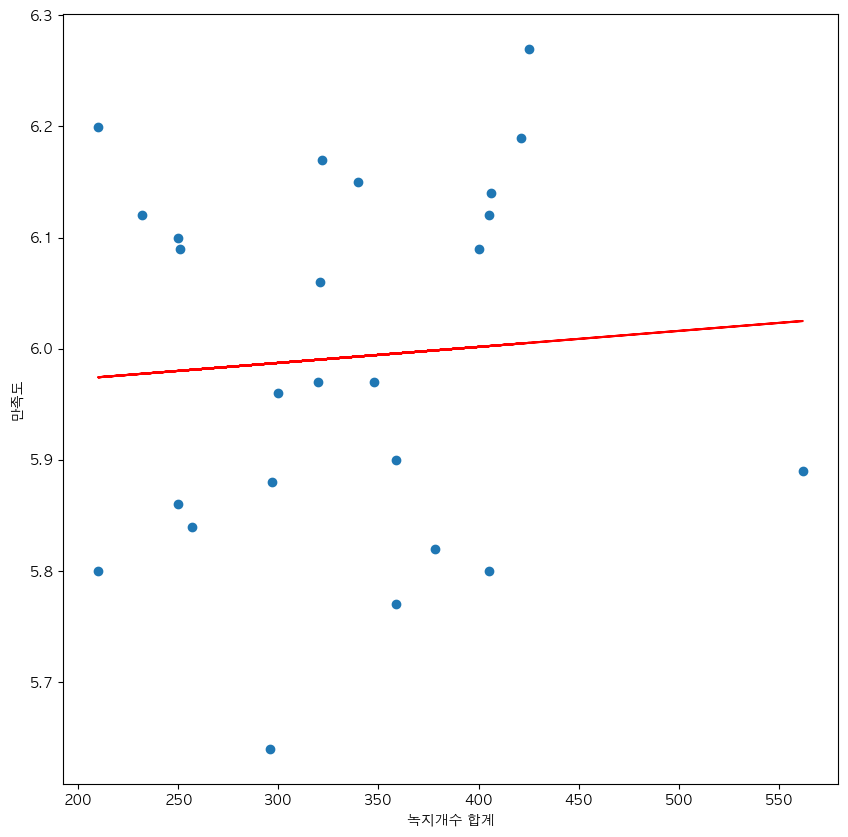

In [14]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gu_greenary_count['합계'].values.reshape(-1, 1)
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('녹지개수 합계')
plt.ylabel('만족도')

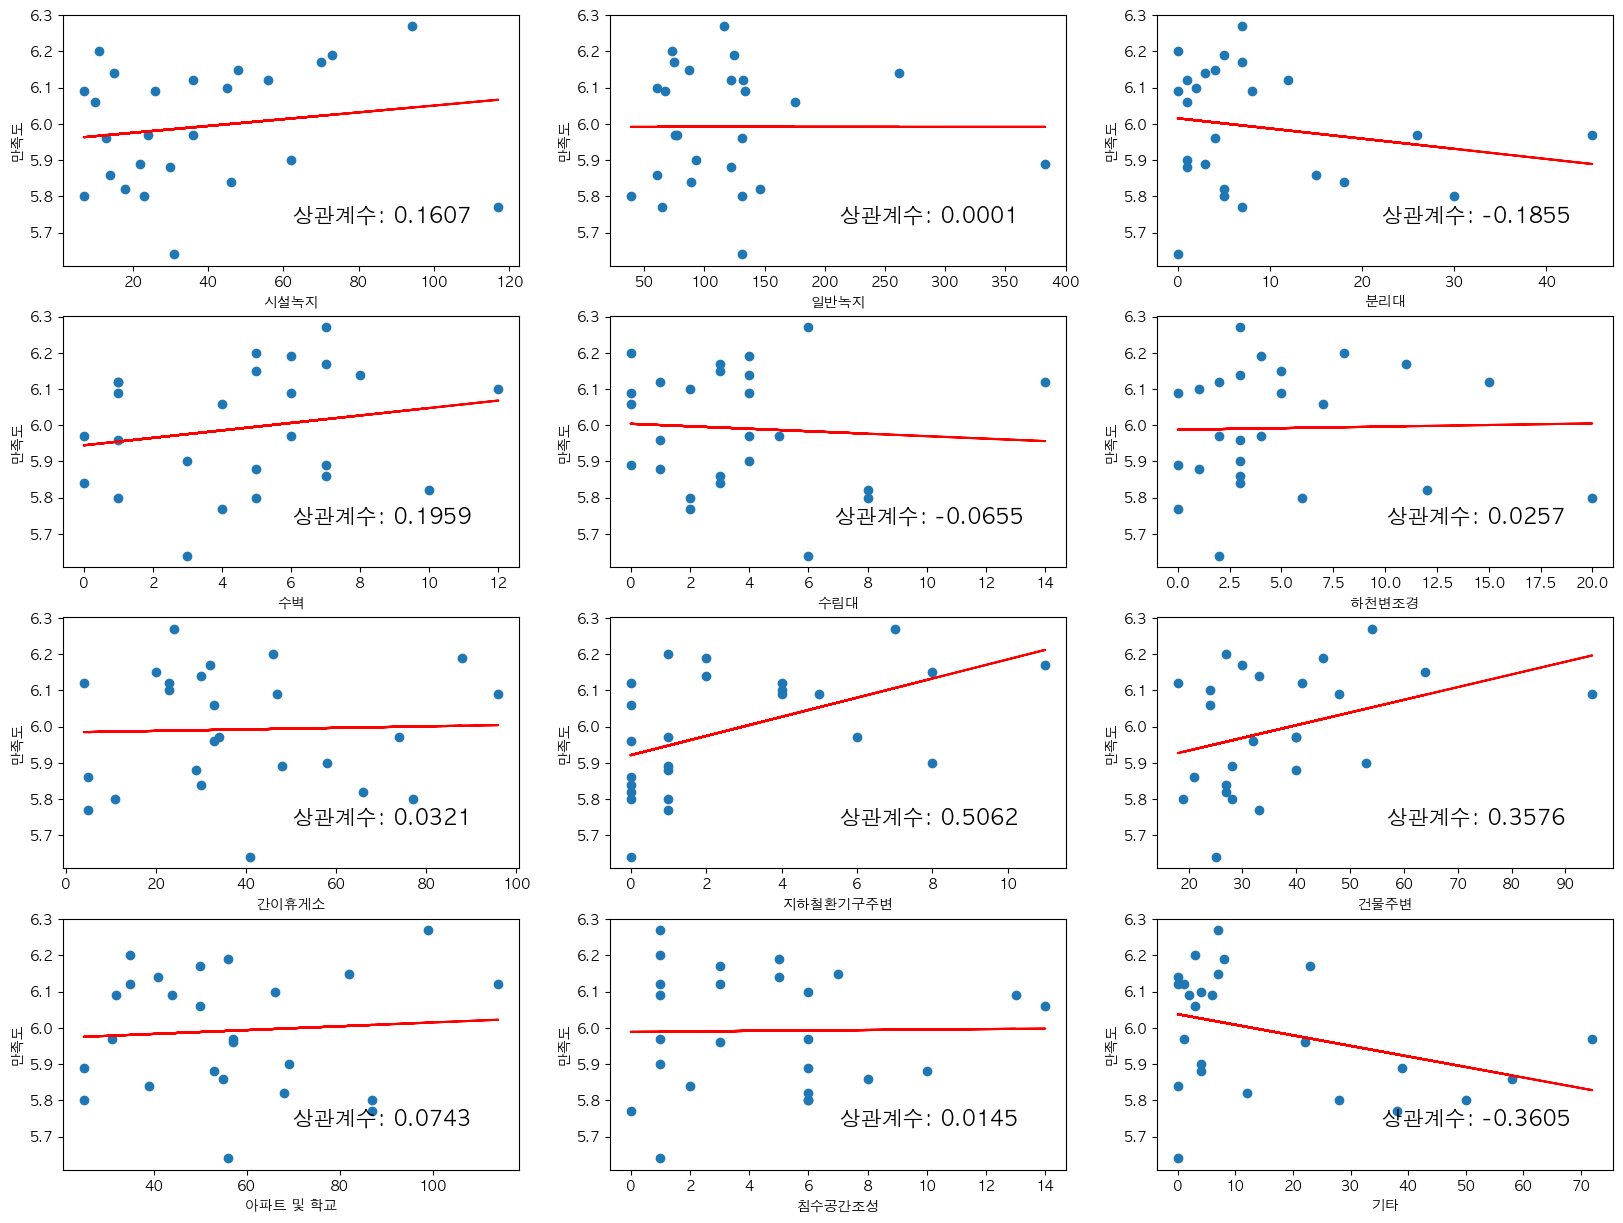

In [15]:
# linear regression for each col
plt.figure(figsize=(20, 15))

for i, col in enumerate(gu_greenary_area.columns[1:]):
    X = gu_greenary_count[col].values.reshape(-1, 1)
    y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

    # train model
    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_pred = model.predict(X)

    # draw graph
    plt.subplot(4, 3, i+1)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(col)
    plt.ylabel('만족도')

    # plt.text(0.7, 0.3, f"Score: {round(model.score(X, y), 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    x = gu_greenary_count[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    plt.text(0.7, 0.2, f"상관계수: {round(corr[0,1], 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

Text(0, 0.5, '예측값')

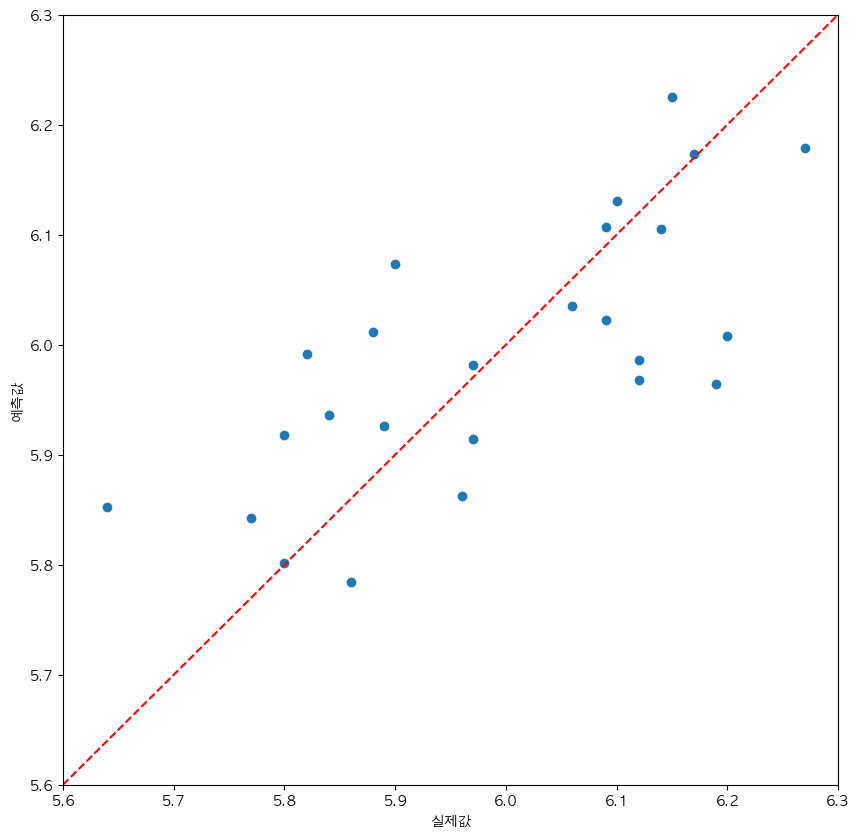

In [16]:
# multiple linear regression

X = gu_greenary_count.iloc[:, 1:]
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred)
plt.plot([5.6, 6.3], [5.6, 6.3], color='red', linestyle='--')
plt.xlim(5.6, 6.3)
plt.ylim(5.6, 6.3)
plt.xlabel('실제값')
plt.ylabel('예측값')


# 녹지 비율에 따른 만족도

In [17]:
# get correlation between greenary count and satisfy
for col in gu_greenary_ratio.columns:
    x = gu_greenary_ratio[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    print(col, round(corr[0,1], 4))

합계 0.182
시설녹지 0.1582
일반녹지 -0.1903
분리대 0.0107
수벽 0.1173
수림대 0.1445
하천변조경 0.2267
간이휴게소 -0.0445
지하철환기구주변 -0.1879
건물주변 -0.0322
아파트 및 학교 -0.0792
침수공간조성 0.0039
기타 0.2026


Text(0, 0.5, '만족도')

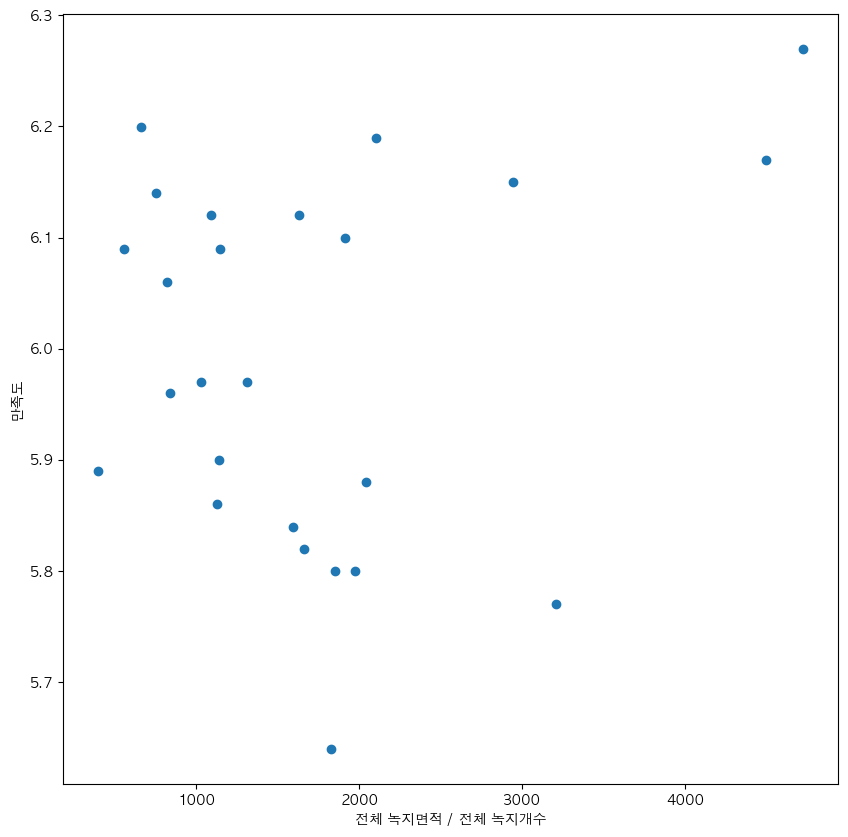

In [18]:
# draw graph for each gu

# Path: greenary.ipynb
# draw graph for each gu
# plt.rc('font', family='Malgun Gothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 10))
plt.scatter(gu_greenary_ratio['합계'], gu_satisfy['10점 평균 (%)'])
plt.xlabel('전체 녹지면적 / 전체 녹지개수')
plt.ylabel('만족도')

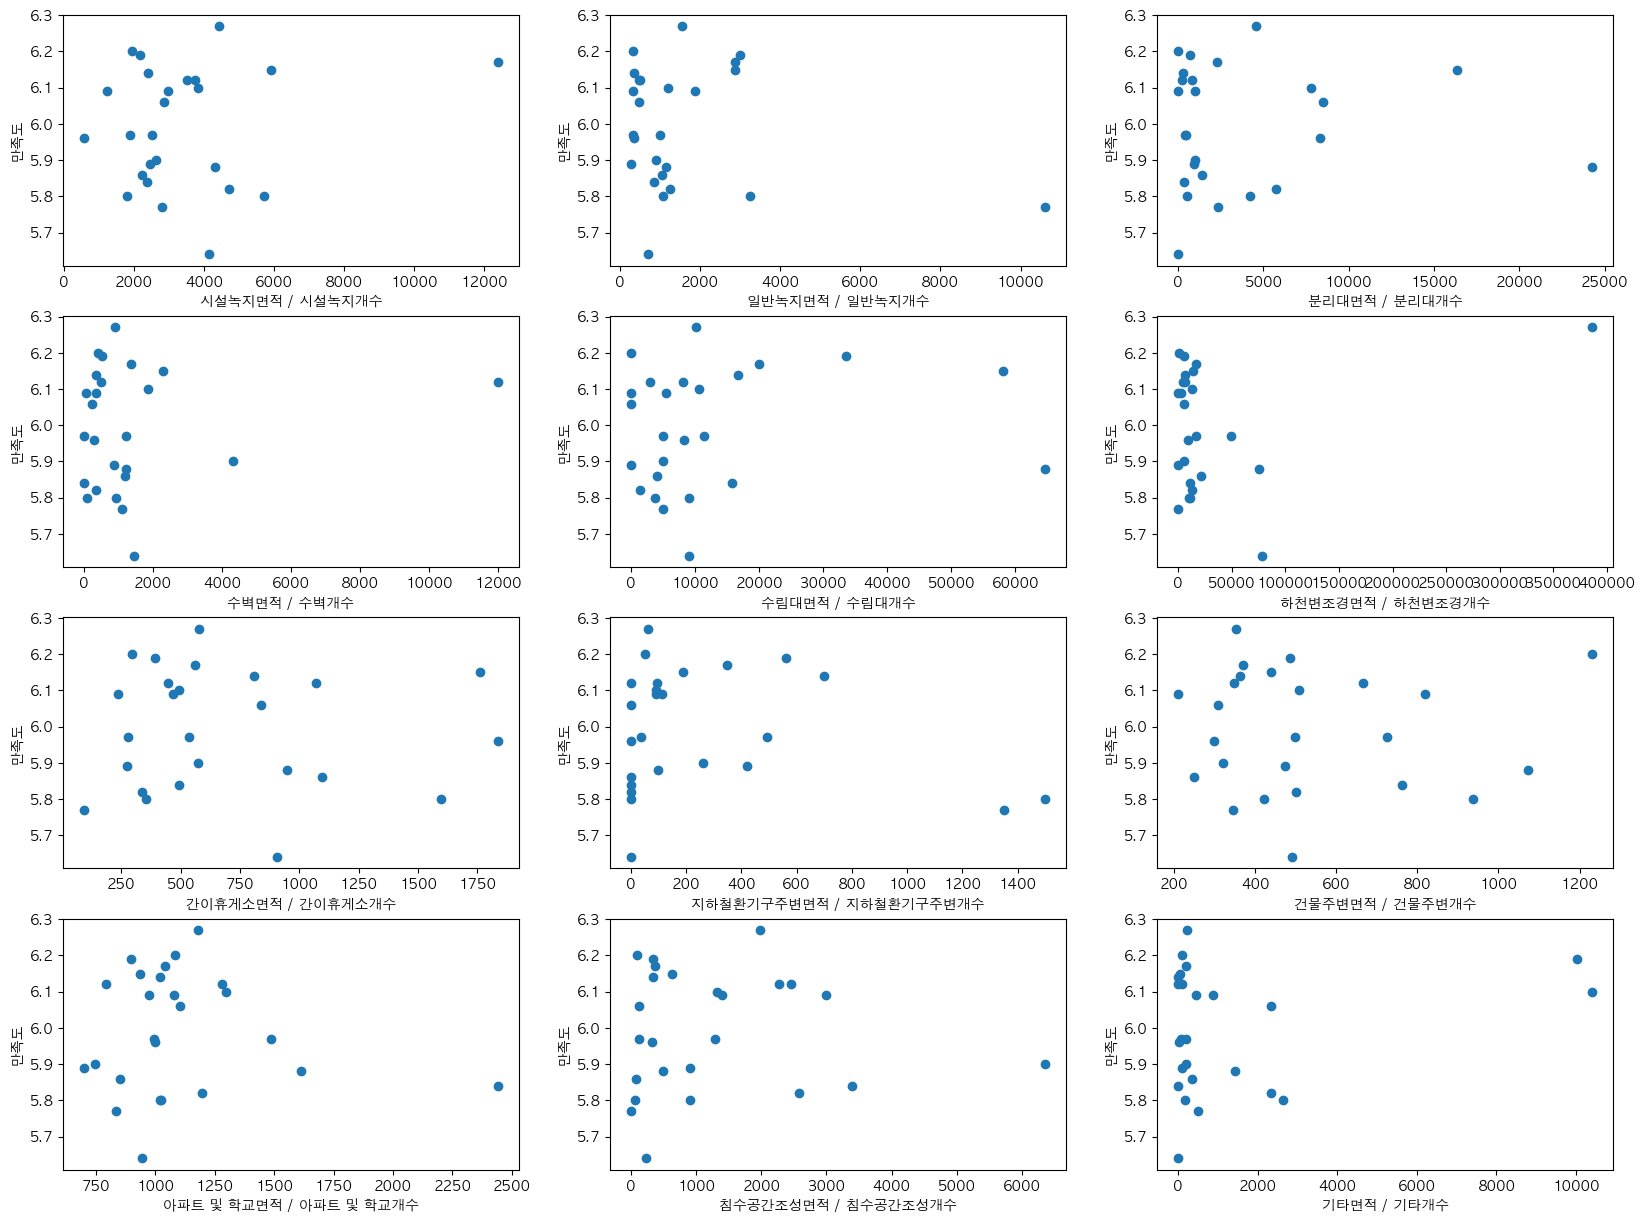

In [19]:
# draw for each col in gu_greenary_area
plt.figure(figsize=(20, 15))
for i, col in enumerate(gu_greenary_ratio.columns[1:]):
    plt.subplot(4, 3, i+1)
    plt.scatter(gu_greenary_ratio[col], gu_satisfy['10점 평균 (%)'])
    plt.xlabel(f'{col}면적 / {col}개수')
    plt.ylabel('만족도')

Text(0, 0.5, '만족도')

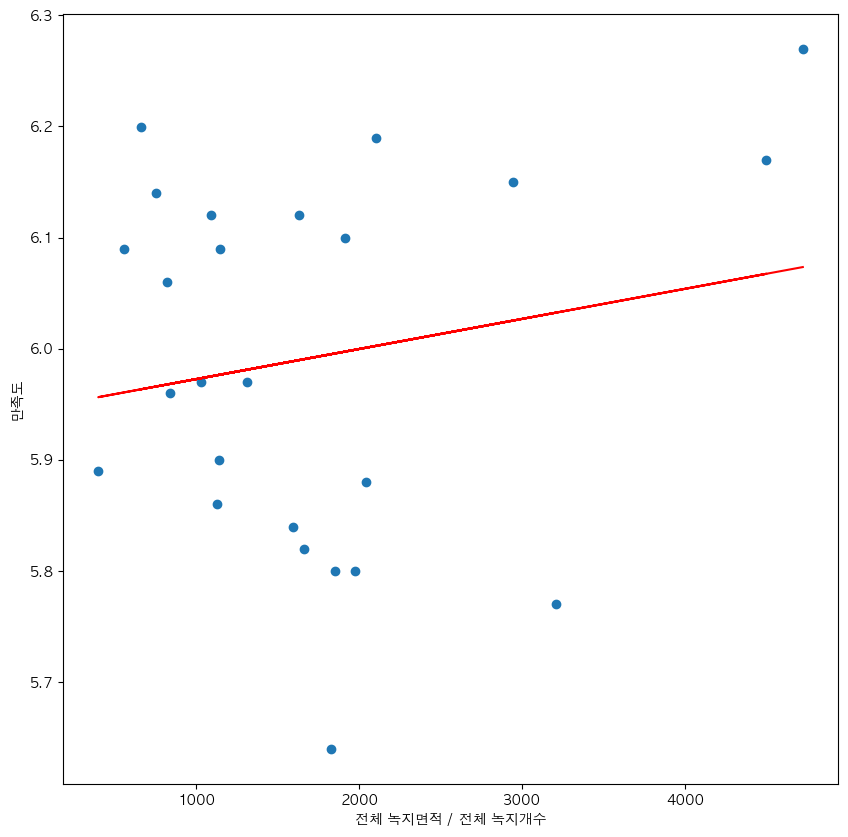

In [20]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gu_greenary_ratio['합계'].values.reshape(-1, 1)
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('전체 녹지면적 / 전체 녹지개수')
plt.ylabel('만족도')

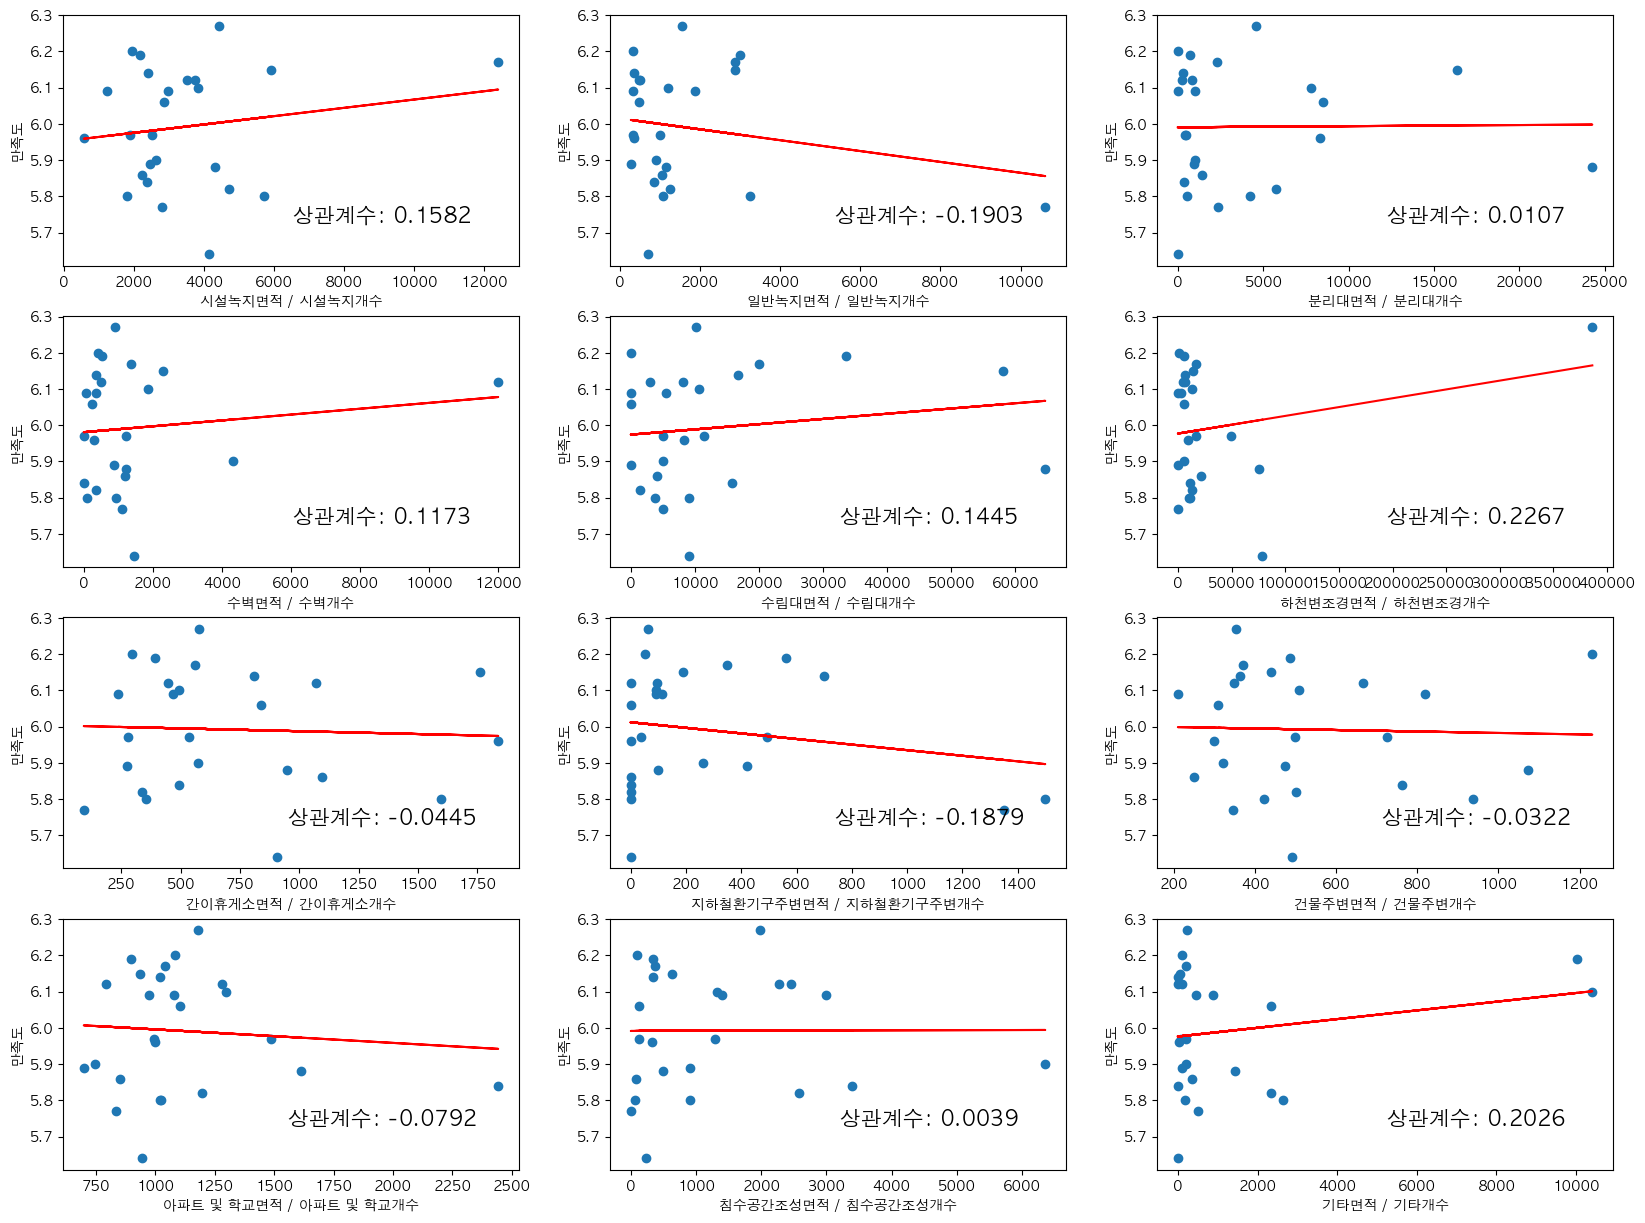

In [21]:
# linear regression for each col
plt.figure(figsize=(20, 15))

for i, col in enumerate(gu_greenary_ratio.columns[1:]):
    X = gu_greenary_ratio[col].values.reshape(-1, 1)
    y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

    # train model
    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_pred = model.predict(X)

    # draw graph
    plt.subplot(4, 3, i+1)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(f'{col}면적 / {col}개수')
    plt.ylabel('만족도')

    # plt.text(0.7, 0.3, f"Score: {round(model.score(X, y), 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    x = gu_greenary_ratio[col]
    y = gu_satisfy['10점 평균 (%)']
    corr = np.corrcoef(x, y)
    plt.text(0.7, 0.2, f"상관계수: {round(corr[0,1], 4)}", fontsize=15, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

Text(0, 0.5, '예측값')

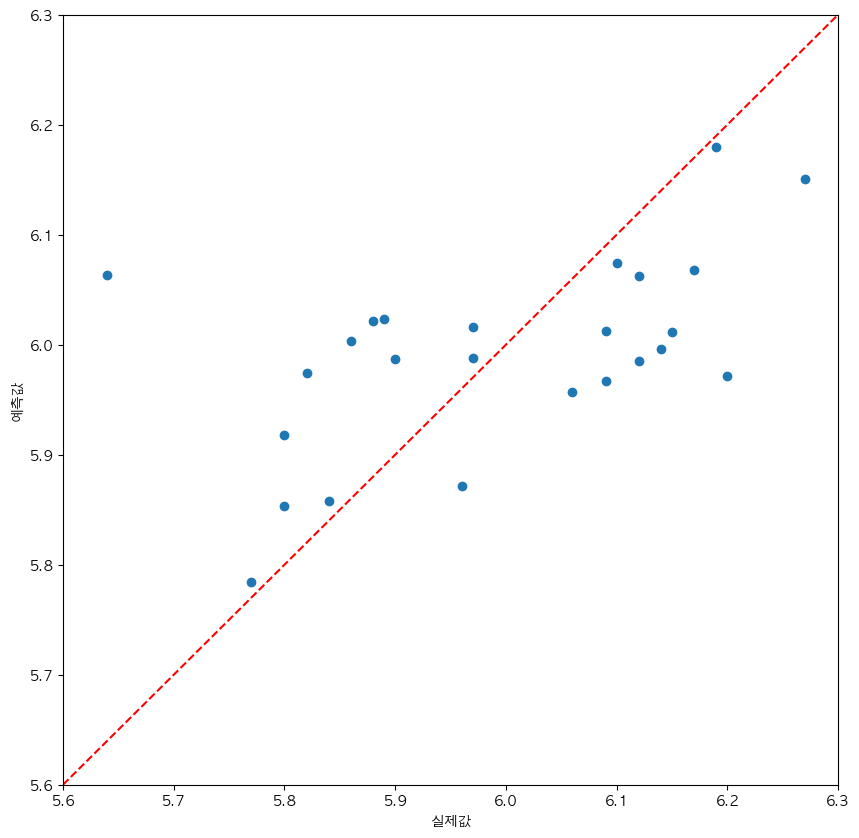

In [22]:
# multiple linear regression

X = gu_greenary_ratio.iloc[:, 1:]
y = gu_satisfy['10점 평균 (%)'].values.reshape(-1, 1)

# train model
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# draw graph
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred)
plt.plot([5.6, 6.3], [5.6, 6.3], color='red', linestyle='--')
plt.xlim(5.6, 6.3)
plt.ylim(5.6, 6.3)
plt.xlabel('실제값')
plt.ylabel('예측값')
